<a href="https://colab.research.google.com/github/yecatstevir/teambrainiac/blob/main/source/VisualizationPlayground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')#, force_remount = True)

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Clone the entire repo.
!git clone -l -s https://github.com/yecatstevir/teambrainiac.git
# Change directory into cloned repo
%cd teambrainiac/source
!ls

Cloning into 'teambrainiac'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (538/538), done.
remote: Compressing objects: 100% (369/369), done.
remote: Total 538 (delta 324), reused 321 (delta 155), pack-reused 0
Receiving objects: 100% (538/538), 60.89 MiB | 2.99 MiB/s, done.
Resolving deltas: 100% (324/324), done.
/content/teambrainiac/source
Access_Load_Data.ipynb		  Masking.ipynb
AccuracyMeasures.ipynb		  Mat_to_Numpy.ipynb
All_subject_masked_labeled.ipynb  models
cross_validation.py		  percent_signal_change.ipynb
data				  process.py
Explore_data.ipynb		  SingleSubjectSVM.ipynb
explore.py			  SVM_Group_Child_Whole_Brain.ipynb
Group_All_MASK_SVM.ipynb	  SVM_Group_YA_Whole_brain.ipynb
Images				  utils.py
__init__.py			  Visualize_Data.ipynb


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving path_config.py to path_config.py
User uploaded file "path_config.py" with length 228 bytes


In [24]:
# Import libraries
!pip install boto3 nilearn nibabel
import nibabel as nib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
from utils import data_to_nib, load_mat, open_pickle, access_load_data, save_data, create_mask, labels_mask_binary, masking_data, masked_data_n_labels
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import numpy as np
from nilearn.signal import clean
from utils import *
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#open path dictionary file to get subject ids
path = "data/data_path_dictionary.pkl"
data_path_dict = open_pickle(path)
mask_data_path = data_path_dict['mask_data'][0]
mask_type_dict = access_load_data(mask_data_path,True)
np_array_mask = mask_type_dict['mask']
indices_mask = np.where(np_array_mask==1)
indices_mask

(array([ 3,  3,  3, ..., 75, 75, 75]),
 array([36, 36, 36, ..., 47, 47, 47]),
 array([33, 34, 35, ..., 28, 29, 30]))

FileNotFoundError: ignored

In [7]:
path_sub = "/content/drive/My Drive/data/model_one_run_zcoreonly/sub_id_one_run_model_znorm10004_08693.pkl"
data = open_pickle(path_sub)

In [26]:
sub_id = '10004_08693'
clf = data['10004_08693']['model']
X_train = data['10004_08693']['X_train']
y_train = data['10004_08693']['y_train']

In [11]:
clf.support_vectors_.shape
alpha_abs = np.abs(clf.support_vectors_)

In [23]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  2.05170554,
         0.38310463, -0.50120045],
       [ 0.        ,  0.        ,  0.        , ...,  0.87418734,
         1.76715126,  1.60141534],
       [ 0.        ,  0.        ,  0.        , ...,  2.83198868,
        -0.27141989, -0.63059219],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.13308725,
        -1.59410484, -1.5201604 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.44166599,
         0.43083037, -0.15615581],
       [ 0.        ,  0.        ,  0.        , ...,  0.97349611,
         1.3648914 ,  1.22402276]])

In [29]:
clf.support_vectors_.shape

(83, 237979)

In [12]:
alphas = np.zeros((84))
alphas[clf.support_] = clf.dual_coef_
alphas = alphas.reshape(1,-1)
bmap = np.dot(alphas,X_train)
bmap2 = np.zeros((79,95,79))
bmap2[indices_mask] = bmap

In [13]:
bmap2 = np.zeros((79,95,79))
bmap2[indices_mask] = bmap

In [16]:

image = nib.load('/content/drive/My Drive/data/w3rtprun_01.nii')

In [ ]:
image.affine

In [ ]:
img_data = image.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

In [19]:
bmap3 = nib.Nifti1Image(bmap2,affine=image.affine)
nib.save(bmap3, '/content/drive/My Drive/data/bmap3.nii')
# x_train = nib.Nifti1Image(X_train,affine=image.affine)
# nib.save(x_train,'/content/drive/My Drive/data/x_train.nii')

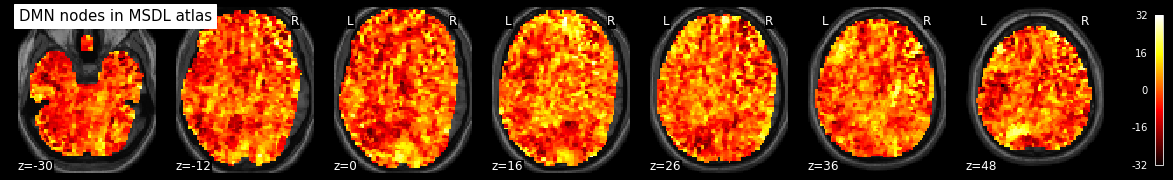

In [20]:
from nilearn import plotting, image
display = plotting.plot_stat_map('/content/drive/My Drive/data/bmap3.nii', bg_img = '/content/drive/My Drive/data/single_subj_T1_resampled.nii',
                                 colorbar=True, cmap='hot', display_mode='z',
                                 title="DMN nodes in MSDL atlas")

In [33]:
from nilearn.image import threshold_img

# Two types of strategies can be used from this threshold function
# Type 1: strategy used will be based on scoreatpercentile
threshold_percentile_img = threshold_img('/content/drive/My Drive/data/bmap3.nii', threshold='95%', copy=False)


# Type 2: threshold strategy used will be based on image intensity
# Here, threshold value should be within the limits i.e. less than max value.
threshold_value_img = threshold_img('/content/drive/My Drive/data/bmap3.nii', threshold=3.0, copy=False)

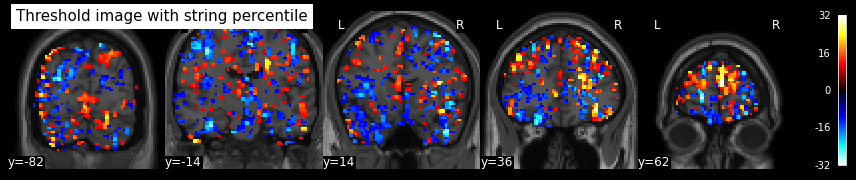

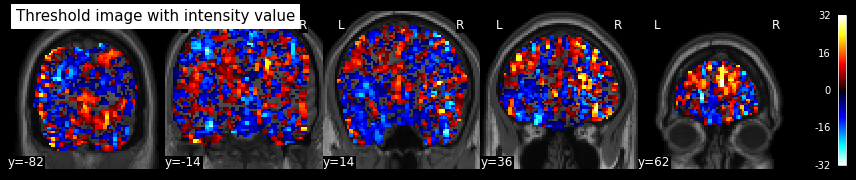

In [35]:
plotting.plot_stat_map(threshold_percentile_img, bg_img = '/content/drive/My Drive/data/single_subj_T1_resampled.nii', display_mode='y', cut_coords=5,
                       title='Threshold image with string percentile', colorbar=True)

# Showing intensity threshold image
plotting.plot_stat_map(threshold_value_img, bg_img = '/content/drive/My Drive/data/single_subj_T1_resampled.nii', display_mode='y', cut_coords=5,
                       title='Threshold image with intensity value', colorbar=True)

In [ ]:
def explore_4d_img(layer):
    plt.figure(figsize = (10, 5))
    plt.imshow(img_4d[:, :, layer, time_point], cmap = 'gray')
    plt.title("Layers of the brain")
    plt.axis('off')
    return layer

# Call interactive component of function above at time point 139 
interact(explore_4d_img, layer = (0, img_4d.shape[2] - 1))
plt.show()

IndexError: ignored

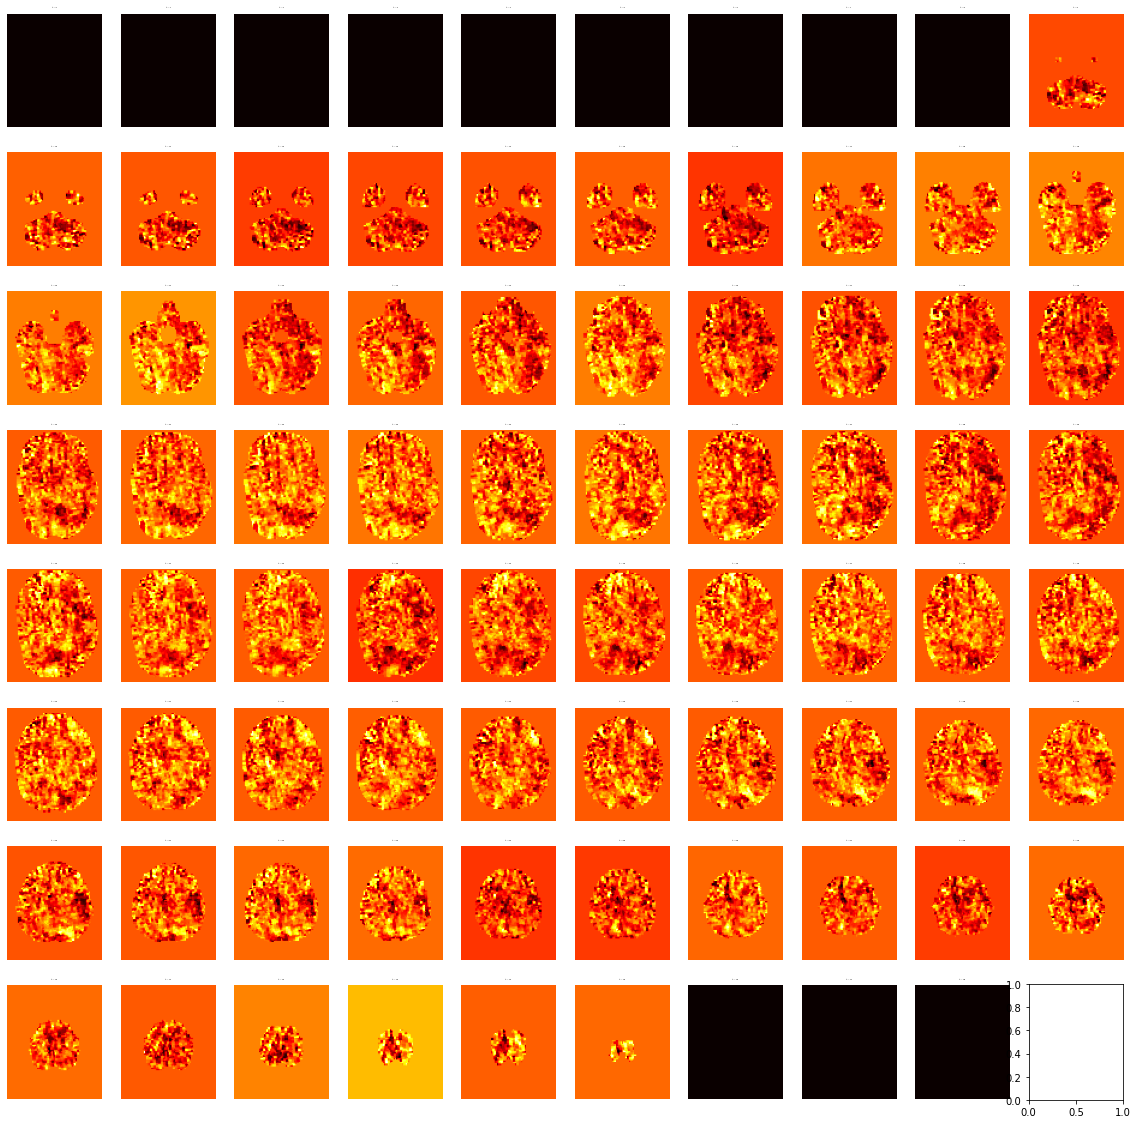

In [17]:
from matplotlib import patches
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=10, nrows=8, figsize=(20, 20))  # 20 timepoints
# Loop over the first 20 volumes/timepoints
for t, ax in enumerate(axes.flatten()):    
    ax.imshow(bmap2[:, :, t].T, cmap='hot', origin='lower')  # index with t!
    #rect = patches.Rectangle((38, 20), 2, 2, linewidth=2, edgecolor='r', facecolor='black')
    #ax.add_patch(rect)
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=2)
fig.tight_layout()

mask shape: (79, 95, 79)
doing lots of correlation calculations...


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


finished with correlations
284680
x 37
y 88
z 43
0.6109015893420785
[ 0.82856917  0.86230362  1.61570653 -1.5215981  -1.07742773  0.07516626
 -0.90875544  1.11531206  0.48560217  1.773134    1.0197311   1.20527062
 -0.08788362 -0.03165952 -0.34651447 -1.05493809 -0.95373472 -1.95452365
 -0.84128652 -2.31998028 -1.45975159  0.25508337  1.20527062  0.87917085
  1.63819617  1.77875641  2.1779475   1.49763592  0.7892123   0.77796748
  0.3843988   0.33379711 -0.12161808 -0.70634869 -0.70634869 -0.11599567
 -0.16097494 -0.75132797 -0.58827808 -1.58906701 -0.79068483 -0.90875544
  0.0414318   0.94663977  0.33941952 -0.29591278 -1.1167846  -0.53205399
 -0.41960579  0.42375567 -0.4814523  -0.12161808  0.53620386  0.30006265
 -0.08226121 -0.34651447 -0.29029037 -0.44771784 -0.12161808 -0.15535254
 -1.29670171 -1.29670171 -1.08867255  0.67114169  0.30006265 -0.37462651
 -0.53205399  0.5586935   0.39002121  0.99161905  1.81249087  1.59321689
  1.34020845  0.72174338  0.98599664  1.71128749  0.4743

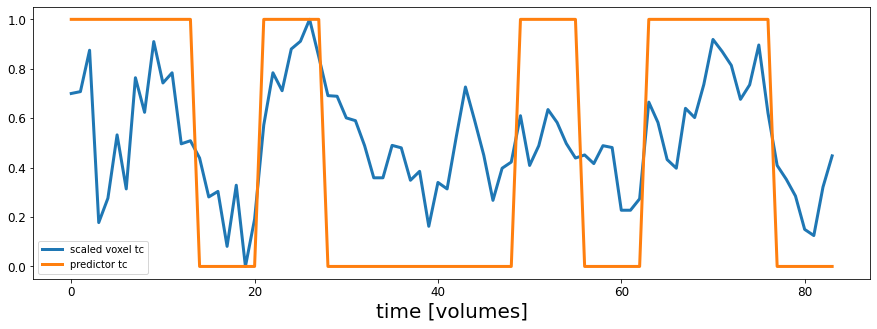

In [28]:
new_masked = X_train.T
#mask_data_path = data_path_dictionary['mask_data'][0]
mask_type_dict = access_load_data(mask_data_path,True)
np_array_mask = mask_type_dict['mask']
print("mask shape:", np_array_mask.shape)

indices_mask = np.where(np_array_mask==1) # gets the indices where the mask is 1, the brain region for x, y, z planes
fake_4d = np.zeros((79,95,79,84))
#mat_4d[indices_mask] = r_matrix
fake_4d.shape

for ind in range(0,len(y_train)):
    fake_4d[indices_mask[0], indices_mask[1], indices_mask[2], ind] = new_masked[:,ind]
    
r_matrix = np.zeros((79,95,79))
p_matrix = np.zeros((79,95,79))

from scipy import stats
r_values = []
p_values = []

# loop over every timeseries in our data
print('doing lots of correlation calculations...')
for idx, val in enumerate(range(0,new_masked.shape[0])):
    r,p = stats.pearsonr(y_train, new_masked[idx,:])
    r_values.append(r)
    p_values.append(p)
print('finished with correlations')
    
# The r and p values are stored in 1d arrays (n voxels). Reshape back into a 3D array for visualization
r_matrix[indices_mask] = r_values
p_matrix[indices_mask] = p_values 


#indices = np.isnan(r_values)
#r_values[indices] = 0
for ind, i in enumerate(r_values):
    if np.isnan(i):
        r_values[ind] = 0
        

r_matrix[indices_mask] = r_values 


# Find the index position of the maximum value in the r_value array
max_idx = r_matrix.argmax()
print(max_idx)
# argmax returns the linear index, so turn into x/y/z index values
max_x, max_y, max_z = np.unravel_index(max_idx, r_matrix.shape)
print("x", max_x)
print("y", max_y)
print("z", max_z)
print(r_matrix[max_x, max_y, max_z])
# use the max_x, _y, and _z indices to get the timecourse of the best correlated voxel
max_corr_timecourse = fake_4d[max_x, max_y,max_z,:]
print(max_corr_timecourse)
# Define the min-max scaling function to put the voxel timecourse and predictor timecourse on the same slace
def scale(data):
    return (data - data.min()) / (data.max() - data.min())

# Create the plots
fig, ax = plt.subplots(1,1,figsize=(15, 5))
ax.plot(scale(max_corr_timecourse), lw=3, label='scaled voxel tc')
ax.plot(y_train, lw=3, label='predictor tc')
#ax.set_xlim(0, acq_num-1)
ax.set_xlabel('time [volumes]', fontsize=20)
ax.tick_params(labelsize=12)
ax.legend()
plt.show()